In [34]:
import numpy as np

import matplotlib.pyplot as plt
import sklearn
%load_ext cudf.pandas
# pandas API is now GPU accelerated

import pandas as pd

The cudf.pandas extension is already loaded. To reload it, use:
  %reload_ext cudf.pandas


# Importar datos

In [35]:
#Cargamos los datos
! pip install openpyxl
data = pd.read_excel('data/bosch_aic_datathon.xlsx')

# Hacemos copia de los datos
data_sucia = data
data_sucia.head()

,Posición,Area,Á.liq.,Grupo de personal,CODIGO POSTAL,Motivo de la RENUNCIA,Banda,Baja,ReglaPHT,Alta,Años,Meses,Antigüedad,Clave de sexo,Lugar de nacimiento,Nacionalidad,Edad del empleado,¿Cuanto tiempo tiene viviendo en Cd. Juarez?,Estado Civil,Hijos
0,POS514,LOG,S6,Exempt,32520,Vol-Otro empleo,E3,2023-01-02,ADMINIST,2018-06-21,5,55.200000,1656,Femenino,JUAREZ,Mexican,31,None,solter,0
1,POS1745,MFS,S5,Direct,32217,Vol-Otro empleo,DNO,2023-01-03,ADMINIST,2017-07-20,6,66.433333,1993,Masculino,DURANGO,Mexican,25,10+ Years,solter,0
2,POS1230,VS7,S5,Direct,32600,Vol-Otro empleo,DNO,2023-01-03,JT012324,2019-08-29,4,40.766667,1223,Masculino,JUAREZ,Mexican,23,10+ Years,solter,0
3,POS1661,MFS,S5,Direct,32575,Vol-Estudios,DO,2023-01-03,JT012324,2022-11-03,1,2.033333,61,Femenino,CIUDAD JUAREZ,Mexican,18,10+ Years,solter,0
4,POS1921,MFS,S5,Direct,32575,Vol-Cambio de domicilio,DO,2023-01-03,JT012324,2017-03-02,6,71.100000,2133,Masculino,JUAREZ,Mexican,26,10+ Years,solter,0


# Limpieza por columnas

In [36]:
# Poner todas las columnas en mayúsculas
data_sucia.columns = map(str.upper, data_sucia.columns)
data_sucia.head()

,POSICIÓN,AREA,Á.LIQ.,GRUPO DE PERSONAL,CODIGO POSTAL,MOTIVO DE LA RENUNCIA,BANDA,BAJA,REGLAPHT,ALTA,AÑOS,MESES,ANTIGÜEDAD,CLAVE DE SEXO,LUGAR DE NACIMIENTO,NACIONALIDAD,EDAD DEL EMPLEADO,¿CUANTO TIEMPO TIENE VIVIENDO EN CD. JUAREZ?,ESTADO CIVIL,HIJOS
0,POS514,LOG,S6,Exempt,32520,Vol-Otro empleo,E3,2023-01-02,ADMINIST,2018-06-21,5,55.200000,1656,Femenino,JUAREZ,Mexican,31,None,solter,0
1,POS1745,MFS,S5,Direct,32217,Vol-Otro empleo,DNO,2023-01-03,ADMINIST,2017-07-20,6,66.433333,1993,Masculino,DURANGO,Mexican,25,10+ Years,solter,0
2,POS1230,VS7,S5,Direct,32600,Vol-Otro empleo,DNO,2023-01-03,JT012324,2019-08-29,4,40.766667,1223,Masculino,JUAREZ,Mexican,23,10+ Years,solter,0
3,POS1661,MFS,S5,Direct,32575,Vol-Estudios,DO,2023-01-03,JT012324,2022-11-03,1,2.033333,61,Femenino,CIUDAD JUAREZ,Mexican,18,10+ Years,solter,0
4,POS1921,MFS,S5,Direct,32575,Vol-Cambio de domicilio,DO,2023-01-03,JT012324,2017-03-02,6,71.100000,2133,Masculino,JUAREZ,Mexican,26,10+ Years,solter,0


### Posicion

### Area

### A Liquida

<Axes: ylabel='Á.LIQ.'>

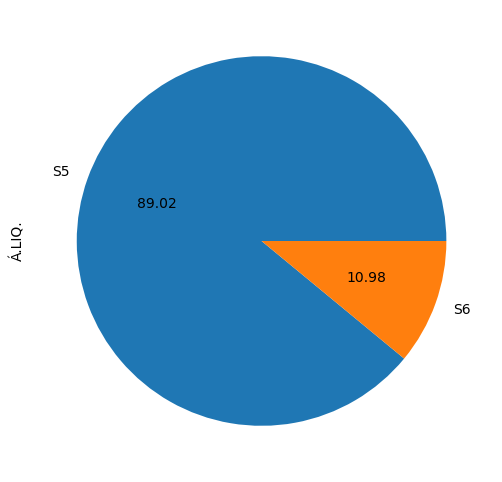

In [37]:
# Convierte columna Á.liq. a categoricos
data_sucia['Á.LIQ.'] = data_sucia['Á.LIQ.'].astype('category')
# Hace plot de pie de la columna Á.liq.
data_sucia['Á.LIQ.'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(6, 6))


In [38]:
# C

### Grupo de personal

### Codigo postal

In [39]:
# Si un valor es menor a 4 digitos, se dropea la fila
data_sucia = data_sucia[data_sucia.apply(lambda x: len(str(x)) >= 4, axis=1)]



In [40]:
"""from geopy.geocoders import Nominatim
from geopy.distance import geodesic

geolocator = Nominatim(user_agent="my_geocoder")
geolocation_cache = {}

# Function to obtain geolocation coordinates from a postal code
def obtener_coordenadas_osm(codigo_postal):
    if codigo_postal in geolocation_cache:
        return geolocation_cache[codigo_postal]

    location = geolocator.geocode({"postalcode": codigo_postal})
    if location:
        coords = (location.latitude, location.longitude)
        geolocation_cache[codigo_postal] = coords
        return coords
    else:
        return None

# Function to calculate the distance between two postal codes
def calcular_distancia_osm(cp_empleado, cp_bosch):
    coords_empleado = obtener_coordenadas_osm(cp_empleado)
    coords_bosch = obtener_coordenadas_osm(cp_bosch)

    if coords_empleado and coords_bosch:
        distancia = geodesic(coords_empleado, coords_bosch).kilometers
        return distancia
    else:
        return None

# Insert a column called "Codigo Postal Bosch" with the value 32557
data_sucia['CODIGO POSTAL BOSCH'] = 32557

# Calcula la distancia entre el codigo postal del empleado y el codigo postal de Bosch y lo guarda en una columna llamada "distancia"
data_sucia['distancia'] = data_sucia.apply(lambda x: calcular_distancia_osm(x['CODIGO POSTAL'], x['CODIGO POSTAL BOSCH']), axis=1)


data_sucia"""

'from geopy.geocoders import Nominatim\nfrom geopy.distance import geodesic\n\ngeolocator = Nominatim(user_agent="my_geocoder")\ngeolocation_cache = {}\n\n# Function to obtain geolocation coordinates from a postal code\ndef obtener_coordenadas_osm(codigo_postal):\n    if codigo_postal in geolocation_cache:\n        return geolocation_cache[codigo_postal]\n\n    location = geolocator.geocode({"postalcode": codigo_postal})\n    if location:\n        coords = (location.latitude, location.longitude)\n        geolocation_cache[codigo_postal] = coords\n        return coords\n    else:\n        return None\n\n# Function to calculate the distance between two postal codes\ndef calcular_distancia_osm(cp_empleado, cp_bosch):\n    coords_empleado = obtener_coordenadas_osm(cp_empleado)\n    coords_bosch = obtener_coordenadas_osm(cp_bosch)\n\n    if coords_empleado and coords_bosch:\n        distancia = geodesic(coords_empleado, coords_bosch).kilometers\n        return distancia\n    else:\n        

In [41]:
# Exportar los datos a CSV
data_sucia.to_csv('data_sucia.csv', index=False)

# Volver a cargar los datos desde CSV
data_sucia = pd.read_csv('data_sucia.csv')

### Motivo de la renuncia

### Motivo de la renuncia

### Baja

### Alta

### Regla PHT

### Años

### Meses

### Dias totales/Antigüedad

### Sexo

In [42]:
data_sucia[["CLAVE DE SEXO"]]

,CLAVE DE SEXO
0,Femenino
1,Masculino
2,Masculino
3,Femenino
4,Masculino
...,...
1398,Masculino
1399,Masculino
1400,Femenino
1401,Femenino


In [43]:
data_sucia["CLAVE DE SEXO"].unique()

array(['Femenino', 'Masculino'], dtype=object)

In [44]:
reemplazo_sexo = {"Femenino":"F",
              "Masculino":"M"}

In [45]:
data_sucia['CLAVE DE SEXO'].replace(reemplazo_sexo)

0       F
1       M
2       M
3       F
4       M
       ..
1398    M
1399    M
1400    F
1401    F
1402    M
Name: CLAVE DE SEXO, Length: 1403, dtype: object

Falta susutituir la columna en data_sucia

### Lugar de nacimiento

In [46]:
# Limpia los datos de la columna Lugar de nacimiento a el nombre del estado de nacimiento. 
# Limpia los datos de la columna Lugar de nacimiento a el nombre del estado de nacimiento. 
# Diccionario de reemplazos
reemplazos = {
    'Chihuahua': ['AZTECA CIUDAD JUAREZ', 'CAMARGO', 'CD JUAREZ', 'CD JUAREZ CHIH', 'CD. JUAREZ'],
    'Durango': ['CD. GOMEZ PALACIO', 'GENERAL SIMON BOLIVAR', 'GOMEZ PALACIO', 'LERDO', 'DURANGO', 'PEÑON BLANCO', 'POBLADO EL LUCERO', 'SAN DIMAS', 'TLAHUALILO DE ZARAGOZA'],
    'Aguascalientes': ['AGUASCALIENTES'],
    'Sinaloa': ['AHOME', 'CULIACAN'],
    'Veracruz': ['ANGEL R CABADA', 'COATZACOALCOS', 'CORDOBA', 'CORDOVA', 'COSAMALOAPAN', 'LAS MERCEDES', 'MARTINEZ DE LA TORRE', 'MINATITLAN', 'MOLOACAN', 'RAYA CARACOL', 'SAN ANDRES TUXTLA', 'TRES VALLES', 'VERACRUZ'],
    # Agrega el resto de tus reemplazos aquí
}

# Invertir el diccionario para mapear cada ciudad a su estado correspondiente
reemplazos_invertidos = {ciudad: estado for estado, ciudades in reemplazos.items() for ciudad in ciudades}

# Realizar los reemplazos
data_sucia['LUGAR DE NACIMIENTO'] = data_sucia['LUGAR DE NACIMIENTO'].replace(reemplazos_invertidos)

# Ver resultados de los reemplazos usando aleatoriedad
data_sucia['LUGAR DE NACIMIENTO'].sample(10)

# Diccionario para la nueva celda de reemplazos
reemplazos_nueva_celda = {
    'PUEBLA': ['GUADALUPE ANALCO', 'PUEBLA'],
    'OAXACA': ['IXHUATAN', 'OAXACA', 'PASO DEL JOBO', 'SAN FRANCISCO DEL MAR', 'SAN JUAN BAUTISTA TUXTEPE', 'SAN LUCAS OJITLAN', 'TUXTEPEC'],
    'TAMAULIPAS': ['MATAMOROS']
}

# Invertir el diccionario para mapear cada ciudad a su estado correspondiente
reemplazos_invertidos_nueva_celda = {ciudad: estado for estado, ciudades in reemplazos_nueva_celda.items() for ciudad in ciudades}

# Realizar los reemplazos
data_sucia['LUGAR DE NACIMIENTO'] = data_sucia['LUGAR DE NACIMIENTO'].replace(reemplazos_invertidos_nueva_celda)

data_sucia['LUGAR DE NACIMIENTO'].sample(10)


552            JUAREZ
290            JUAREZ
1225    CIUDAD JUAREZ
126         CHIHUAHUA
691            OAXACA
345         CHIHUAHUA
1060         Veracruz
711           ATLANTA
520          JUCHITAN
81             JUAREZ
Name: LUGAR DE NACIMIENTO, dtype: object

### Nacionalidad

### Edad del empleado

In [47]:
# Edad del empleado
# Convertir en tipos de datos enteros
data_sucia['EDAD DEL EMPLEADO'] = data_sucia['EDAD DEL EMPLEADO'].astype(int)
# Cambiar nombre de columna a Edad
data_sucia = data_sucia.rename(columns={'EDAD DEL EMPLEADO': 'EDAD'})

# Ver resultados de los reemplazos usando aleatoriedad
data.columns 

StringIndex(['POSICIÓN' 'AREA' 'Á.LIQ.' 'GRUPO DE PERSONAL' 'CODIGO POSTAL'
 'MOTIVO DE LA RENUNCIA' 'BANDA' 'BAJA' 'REGLAPHT' 'ALTA' 'AÑOS' 'MESES'
 'ANTIGÜEDAD' 'CLAVE DE SEXO' 'LUGAR DE NACIMIENTO' 'NACIONALIDAD'
 'EDAD DEL EMPLEADO' '¿CUANTO TIEMPO TIENE VIVIENDO EN CD. JUAREZ?'
 'ESTADO CIVIL' 'HIJOS'], dtype='object')

### Tiempo viviendo en Ciudad Juarez

In [48]:
# Categorizar "Tiempo Viviendo en Ciudad Juárez"

def categorize_time_living(time):
    if pd.isna(time) or isinstance(time, str) and 'Days' in time:
        return 'Menos de 1 Año'
    elif isinstance(time, str) and any(x in time for x in ['1-2 Years', '2-3 Years']) or (isinstance(time, int) and 1 <= time <= 3):
        return '1-3 Años'
    elif isinstance(time, str) and any(x in time for x in ['3-4 Years', '4-5 Years', '5-6 Years']) or (isinstance(time, int) and 4 <= time <= 6):
        return '4-6 Años'
    elif isinstance(time, str) and any(x in time for x in ['6-7 Years', '7-8 Years', '8-9 Years']) or (isinstance(time, int) and 7 <= time <= 9):
        return '7-9 Años'
    else:
        return '10+ Años'

# Apply the categorization
data_sucia['TIEMPO VIVIENDO EN CD JUAREZ - CATEGORIA'] = data_sucia['¿CUANTO TIEMPO TIENE VIVIENDO EN CD. JUAREZ?'].apply(categorize_time_living)

# Display the first few rows to verify the categorization
data_sucia[['¿CUANTO TIEMPO TIENE VIVIENDO EN CD. JUAREZ?', 'TIEMPO VIVIENDO EN CD JUAREZ - CATEGORIA']].head()

# Saber cuantos valores hay en cada categoria de la columna Tiempo Viviendo en Cd. Juarez - Categoría
data_sucia['TIEMPO VIVIENDO EN CD JUAREZ - CATEGORIA'].value_counts()

Menos de 1 Año    788
10+ Años          511
4-6 Años           43
7-9 Años           41
1-3 Años           20
Name: TIEMPO VIVIENDO EN CD JUAREZ - CATEGORIA, dtype: int64

### Estado civil

In [59]:
data_sucia['ESTADO CIVIL'].unique()

array(['Solter', 'Casad', 'U-Libr', 'Sep'], dtype=object)

In [60]:
data_sucia['ESTADO CIVIL'].fillna('Solter', inplace=True)
data_sucia['ESTADO CIVIL'].unique()


def categorize_civil(value):
    if value in ['Solter','viud.','solter']:
        return 'Solter'
    elif value in ['casad.','Casad.']:
        return 'Casad'
    elif value in ['Divorc','Sep.','divorc']:
        return 'Sep'
    elif value in ['Concu.','U.Libr']:
        return 'U-Libr'
    else:
        return value

data_sucia['ESTADO CIVIL'] = data_sucia['ESTADO CIVIL'].apply(categorize_civil)

### Hijos - Victor

In [55]:
# Convertir columna hijos a enteros
data_sucia['HIJOS'] = data_sucia['HIJOS'].astype(int)

# Crear una columna con nombre 'Tiene Hijos' que sera 'Sí' si 'Hijos' > 0 y 'No' si 'Hijos' == 0
data_sucia['TIENE HIJOS'] = data['HIJOS'].apply(lambda x: 'Sí' if x > 0 else 'No')

# Convertir columna Tiene Hijos booleana
data_sucia['TIENE HIJOS'] = data_sucia['TIENE HIJOS'].astype('category')


----
# Subida de datos en DB MySQL

In [ ]:
"""# Importar libreria para trabajar con mysql
#! pip install mysql-connector-python
import mysql.connector

# Hacer un mapeo de los datos necesarios para conectarse
config = {
    'user': 'datathonequipo5',
    'password': 'CodedSpiritDev05',
    'host': 'datathon.mysql.database.azure.com',
    'database': 'datathon'
}

# Conectarse a la base de datos
cnx = mysql.connector.connect(**config)

# Verificar la conexión
cnx.is_connected()

# Cerrar la conexión
cnx.close()"""